#Clase: Regresiones Lineales
En base a lo entregado por el profesor: Christian Alvarez Carreño

##Setup

In [ ]:
#Para los gráficos
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
#Creamos una carpeta para guardar las imágenes en alta resolución
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#Regresión Lineal

##Solución Cerrada

In [ ]:
import numpy as np

np.random.seed(42)  # Para hacer el código reproducible
m = 100  # Número de instancias
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

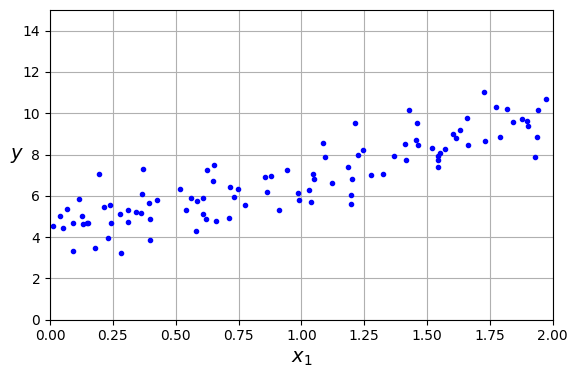

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("generated_data_plot")
plt.show()

Ahora vamos a calcular "Theta tongo" utilizando la ecuación normal. La función inv() calcula la inversa de una matriz y @ para la multiplicación de matrices.

In [ ]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # agrega x0 = 1 a cada instancia
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

Ahora vamos a hacer predicciones de este método:

In [ ]:
X_new = np.array([[0], [2]]) #probemos usando x=0 y x=2
X_new_b = add_dummy_feature(X_new)  # agrega x0 = 1 a cada instancia
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

Vamos a trazar las predicciones de este modelo.

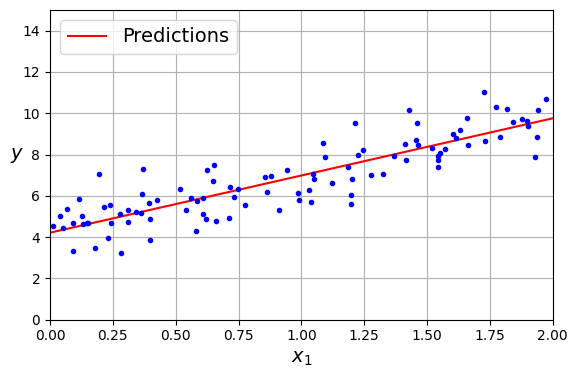

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # Formateo de la figura
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("linear_model_predictions_plot")

plt.show()

##Usando Sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [ ]:
lin_reg.predict(X_new) #X_new: [[0], [2]]

array([[4.21509616],
       [9.75532293]])

La clase *LinearRegression* se basa en la función *scipy.linalg.lstsq()* (el nombre significa "**mínimos cuadrados**"), a la que puede llamar directamente:

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

##Descenso del gradiente por lotes

In [ ]:
eta = 0.1  # tasa de aprendizaje
n_epochs = 1000
m = len(X_b)  # número de instancias

np.random.seed(42)
theta = np.random.randn(2, 1)  # inicialización aleatoria

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y) # @ multiplica matrices
    theta = theta - eta * gradients

theta

array([[4.21509616],
       [2.77011339]])

Vamos a graficar el descenso del gradiente con 3 tasas de aprendizaje distintas

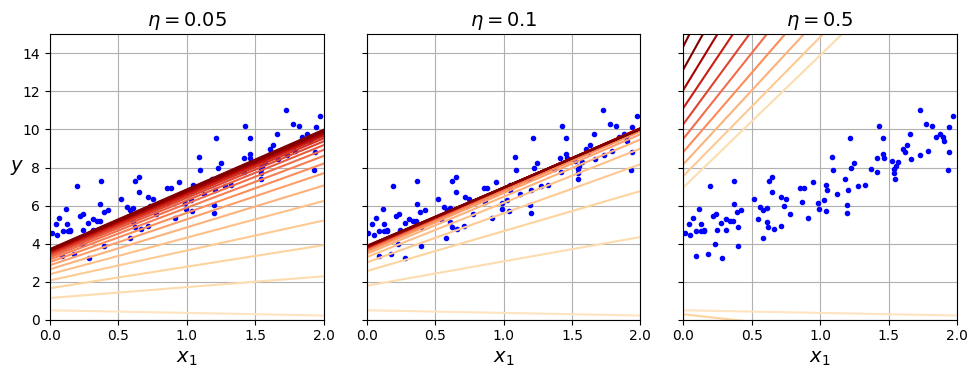

In [ ]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # inicialización aleatoria

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.05) #con 0.02
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)  #con 0.1
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)  #con 0.5
save_fig("gradient_descent_plot")
plt.show()

##Descenso del gradiente estocástico

Vamos a graficar los primeros 20 pasos del descenso del gradiente.

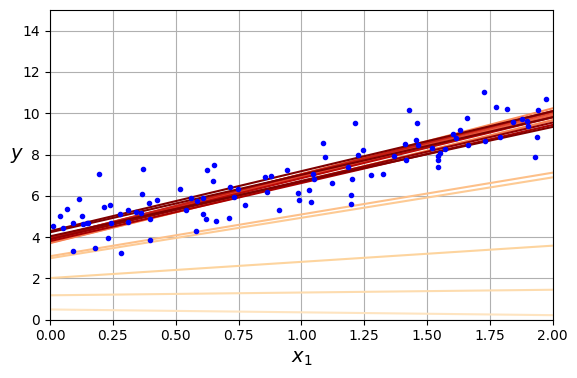

In [ ]:
theta_path_sgd = []  #Para almacenar la ruta de Theta
n_epochs = 50
t0, t1 = 5, 50  # hiperparámetros del cronograma de aprendizaje

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # inicialización aleatoria

n_shown = 20  #Los primeros 20 pasos
plt.figure(figsize=(6, 4))  # Para el formato

for epoch in range(n_epochs):
    for iteration in range(m):

        # Estas 4 líneas se utilizan para generar la figura
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # Para SGD, no dividir por m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  # Para generar la figura

plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("sgd_plot")
plt.show()

Mientras que el código del descenso del gradiente por lotes iteraba 1000 veces a través de todo el conjunto de entrenamiento completo, este código sólo pasa 50 veces por el conjunto de entrenamiento y llega a una solución bastante buena:

In [ ]:
theta

array([[4.21076011],
       [2.74856079]])

El siguiente código lleva a cabo una regresión lineal utilizando el descenso del gradiente estocástico con Sklearn utilizando la clase SGDRegressor.

**Condiciones de ejecución:**

El código se va a ejecutar hasta que se cumplan una de estas dos siguientes condiciones:

*   Máximas iteraciones: 1000
*   Tolerancia de pérdida: 0.001

Empieza con una tasa de aprendizaje de 0.1 *(eta0=0.1)* y no realiza ninguna penalización *(penalty = None)*.


In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.05,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets

#max_iter: cuantas veces voy a iterar como maximo
#tol: hasta que valor voy a permitir que llegue mi eta (una perdida, una tolerancia)
#max_iter o tol, la que se cumpla primero es la que va a hacer que pueda parar
#penalty:una penalización
#El eta es el valor con el que voy a partir, inicio con 0
#n_iter_no_change: despues de este numero de iteraciones va a empezar a bajar la taza
#random_state:para que de siempre lo mismo
#ravel: te deja los datos en una sola dimension par que resuelva

SGDRegressor(eta0=0.05, n_iter_no_change=100, penalty=None, random_state=42)

In [ ]:
#¿qué hace ravel?
demo_ravel = np.array([[1, 2, 3], [4, 5, 6]])
np.ravel(demo_ravel)

array([1, 2, 3, 4, 5, 6])

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.22237215]), array([2.78304658]))

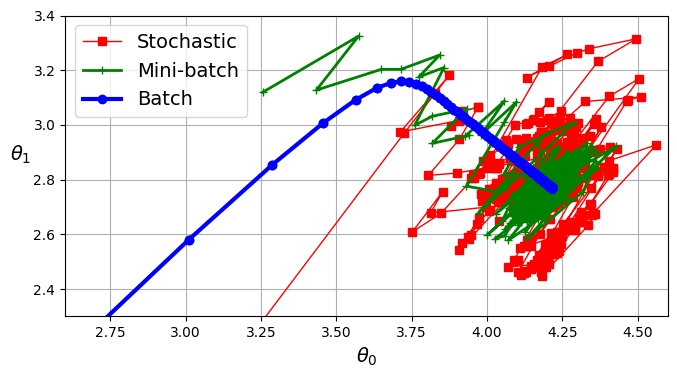

In [ ]:

from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # Inicialización aleatoria

t0, t1 = 200, 1000  # hiperparámetros del cronograma de aprendizaje

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
save_fig("gradient_descent_paths_plot")
plt.show()



```
# Tiene formato de código
```

# Tarea

In [ ]:

np.random.seed(0)

X = 3*np.random.rand(100,1)

u = 7*np.random.rand(100,1) - 2

y = 5 + 2*X + u



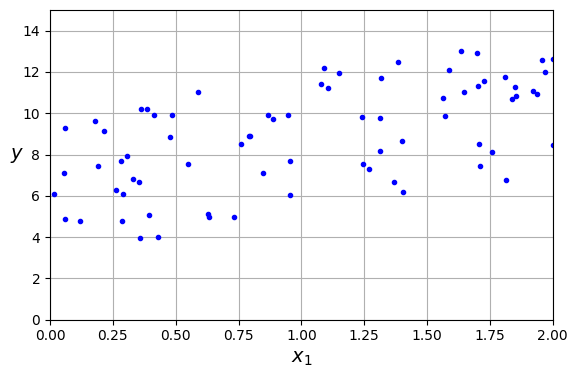

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("generated_data_plot")
plt.show()

In [ ]:
X_b = add_dummy_feature(X)  # agrega x0 = 1 a cada instancia
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best


array([[6.90656017],
       [1.85195247]])

In [ ]:
X_new = np.array([[0], [2]]) #probemos usando x=0 y x=2
X_new_b = add_dummy_feature(X_new)  # agrega x0 = 1 a cada instancia
y_predict = X_new_b @ theta_best
y_predict

array([[ 6.90656017],
       [10.61046512]])

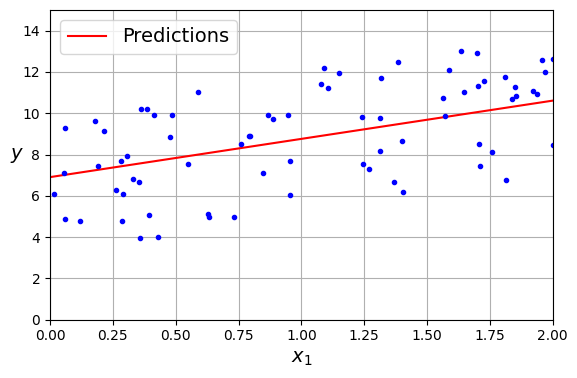

In [ ]:
plt.figure(figsize=(6, 4))  # Formateo de la figura
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("linear_model_predictions_plot")

plt.show()

In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
import pandas as pd

In [ ]:
#Ajusta el modelo de regresión lineal a tus datos:

modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X)

ecm = mean_squared_error(y, y_pred)
ecm

6.29582825969201

##Usando Sklearn

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([6.90656017]), array([[1.85195247]]))

In [ ]:
lin_reg.predict(X_new) #X_new: [[0], [2]]

array([[ 6.90656017],
       [10.61046512]])

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[6.90656017],
       [1.85195247]])

In [ ]:
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X)

ecm = mean_squared_error(y, y_pred)
ecm

3.735429045608752

##Descenso del gradiente por lotes 1

In [ ]:
eta = 0  # tasa de aprendizaje
n_epochs = 1000
m = len(X_b)  # número de instancias

np.random.seed(0)
theta = np.random.randn(2, 1)  # inicialización aleatoria

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y) # @ multiplica matrices
    theta = theta - eta * gradients

theta

array([[1.76405235],
       [0.40015721]])

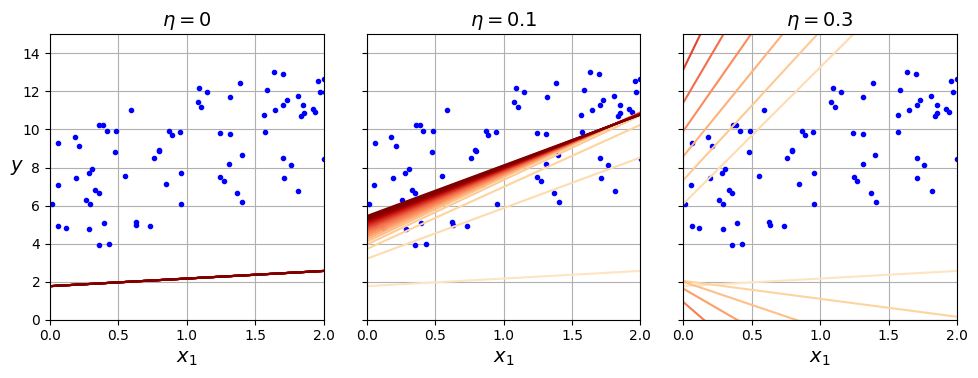

In [ ]:
def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(0)
theta = np.random.randn(2, 1)  # inicialización aleatoria

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0) #con 0.02
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)  #con 0.1
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.3)  #con 0.5
save_fig("gradient_descent_plot")
plt.show()

In [ ]:
# Definir los hiperparámetros
eta = 0  # tasa de aprendizaje
n_epochs = 1000
m = len(X_b)  # número de instancias
np.random.seed(0)
theta = np.random.randn(2, 1)  # inicialización aleatoria


In [ ]:
# Listas para almacenar predicciones y errores en cada época
predictions = []

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)  # Cálculo de gradientes
    theta = theta - eta * gradients  # Actualización de theta

    # Calcular las predicciones en cada época y registrarlas
    y_pred = X_b @ theta
    predictions.append(y_pred)

# Calcular el ECM para cada conjunto de predicciones
ecm_values = [mean_squared_error(y, pred) for pred in predictions]

# El último valor de ECM es el correspondiente a los parámetros finales
final_ecm = ecm_values[-1]

print("Error Cuadrático Medio Final:", final_ecm)

Error Cuadrático Medio Final: 57.17671234587766


##Descenso del gradiente por lotes 2

In [ ]:
eta = 0.3  # tasa de aprendizaje
n_epochs = 1000
m = len(X_b)  # número de instancias

np.random.seed(0)
theta = np.random.randn(2, 1)  # inicialización aleatoria

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y) # @ multiplica matrices
    theta = theta - eta * gradients

theta

array([[-1.35492199e+53],
       [-2.43504291e+53]])

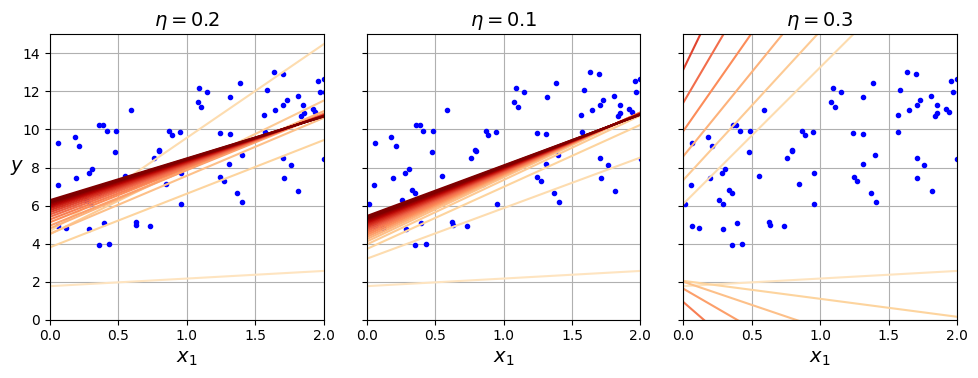

In [ ]:
def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(0)
theta = np.random.randn(2, 1)  # inicialización aleatoria

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.2) #con 0.02
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)  #con 0.1
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.3)  #con 0.5
save_fig("gradient_descent_plot")
plt.show()

In [ ]:
# Definir los hiperparámetros
eta = 0.2  # tasa de aprendizaje
n_epochs = 1000
m = len(X_b)  # número de instancias

np.random.seed(0)
theta = np.random.randn(2, 1)  # inicialización aleatoria

# Listas para almacenar predicciones y errores en cada época
predictions = []

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)  # Cálculo de gradientes
    theta = theta - eta * gradients  # Actualización de theta

    # Calcular las predicciones en cada época y registrarlas
    y_pred = X_b @ theta
    predictions.append(y_pred)

# Calcular el ECM para cada conjunto de predicciones
ecm_values = [mean_squared_error(y, pred) for pred in predictions]

# El último valor de ECM es el correspondiente a los parámetros finales
final_ecm = ecm_values[-1]

print("Error Cuadrático Medio Final:", final_ecm)


Error Cuadrático Medio Final: 3.7354290456087527


##Descenso del gradiente estocástico 1

Regresión lineal utilizando el descenso del gradiente estocástico con Sklearn utilizando la clase SGDRegressor.

**Condiciones de ejecución:**

El código se va a ejecutar hasta que se cumplan una de estas dos siguientes condiciones:

*   Máximas iteraciones: 1000
*   Tolerancia de pérdida: 0.001



In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.03,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.03, n_iter_no_change=100, penalty=None, random_state=42)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([6.89906789]), array([1.84372275]))

In [ ]:
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [ ]:
y_pred = modelo.predict(X)

ecm = mean_squared_error(y, y_pred)

ecm

3.735429045608752

In [ ]:
# Definir los hiperparámetros
eta = 0  # Tasa de aprendizaje
n_epochs = 1000
m = len(X_b)  # Número de instancias

np.random.seed(0)
theta = np.random.randn(2, 1)  # Inicialización aleatoria

# Listas para almacenar predicciones y errores en cada época
predictions = []

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)  # Seleccionar una instancia aleatoria
        xi = X_b[random_index:random_index+1]  # Instancia seleccionada
        yi = y[random_index:random_index+1]  # Valor objetivo correspondiente
        gradients = 2 * xi.T @ (xi @ theta - yi)  # Cálculo de gradientes para la instancia actual
        theta = theta - eta * gradients  # Actualizar theta

    # Calcular las predicciones en cada época y registrarlas
    y_pred = X_b @ theta
    predictions.append(y_pred)

# Calcular el ECM para cada conjunto de predicciones
ecm_values = [mean_squared_error(y, pred) for pred in predictions]

# El último valor de ECM es el correspondiente a los parámetros finales
final_ecm = ecm_values[-1]

print("Error Cuadrático Medio Final:", final_ecm)


Error Cuadrático Medio Final: 57.17671234587766


##Descenso del gradiente estocástico 2

Regresión lineal utilizando el descenso del gradiente estocástico con Sklearn utilizando la clase SGDRegressor.

**Condiciones de ejecución:**

El código se va a ejecutar hasta que se cumplan una de estas dos siguientes condiciones:

*   Máximas iteraciones: 1000
*   Tolerancia de pérdida: 0.001



In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.2,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.2, n_iter_no_change=100, penalty=None, random_state=42)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([6.93717811]), array([1.89220697]))

In [ ]:
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [ ]:
y_pred = modelo.predict(X)

ecm = mean_squared_error(y, y_pred)
ecm

3.735429045608752

In [ ]:
# Definir los hiperparámetros
eta = 0.2  # Tasa de aprendizaje
n_epochs = 1000
m = len(X_b)  # Número de instancias

np.random.seed(0)
theta = np.random.randn(2, 1)  # Inicialización aleatoria

# Listas para almacenar predicciones y errores en cada época
predictions = []

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)  # Seleccionar una instancia aleatoria
        xi = X_b[random_index:random_index+1]  # Instancia seleccionada
        yi = y[random_index:random_index+1]  # Valor objetivo correspondiente
        gradients = 2 * xi.T @ (xi @ theta - yi)  # Cálculo de gradientes para la instancia actual
        theta = theta - eta * gradients  # Actualizar theta

    # Calcular las predicciones en cada época y registrarlas
    y_pred = X_b @ theta
    predictions.append(y_pred)

# Calcular el ECM para cada conjunto de predicciones
ecm_values = [mean_squared_error(y, pred) for pred in predictions]

# El último valor de ECM es el correspondiente a los parámetros finales
final_ecm = ecm_values[-1]

print("Error Cuadrático Medio Final:", final_ecm)


Error Cuadrático Medio Final: 4.710810884295497
